# %% [markdown]
# # 参数估计与假设检验：数学建模实战
# 
# 作为数学老师，我将通过两个典型例题演示参数估计和假设检验在数学建模中的应用。
# 本 Notebook 包含：
# 1. 电池寿命问题：参数估计（点估计 + 置信区间）
# 2. 算法性能问题：假设检验（单样本 t 检验）
# 
# 所有代码均包含详细注释和可视化，便于理解统计概念在建模中的实际应用

In [1]:
 # 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
# 设置可视化风格
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

In [3]:
# 设置随机种子确保结果可复现
np.random.seed(42)

# %% [markdown]
# ## 例题1：参数估计（电池寿命问题）
# 
# **问题背景**：  
# 某工厂声称电池平均寿命为 120 小时。工程师抽取 16 个电池样本测试，得到样本均值 115 小时，样本标准差 8 小时。  
# **任务**：
# 1. 计算总体均值的点估计
# 2. 构建 95% 置信区间
# 3. 分析结果对生产决策的影响

【点估计】总体均值的点估计值: 115.00 小时
【置信区间】95% 置信区间: (110.737, 119.263) 小时
【置信区间】区间宽度: 8.526 小时


/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_45441/3408701608.py:56: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_45441/3408701608.py:56: UserWarning: Glyph 27744 (\N{CJK UNIFIED IDEOGRAPH-6C60}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_45441/3408701608.py:56: UserWarning: Glyph 23551 (\N{CJK UNIFIED IDEOGRAPH-5BFF}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_45441/3408701608.py:56: UserWarning: Glyph 21629 (\N{CJK UNIFIED IDEOGRAPH-547D}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_45441/3408701608.py:56: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/i

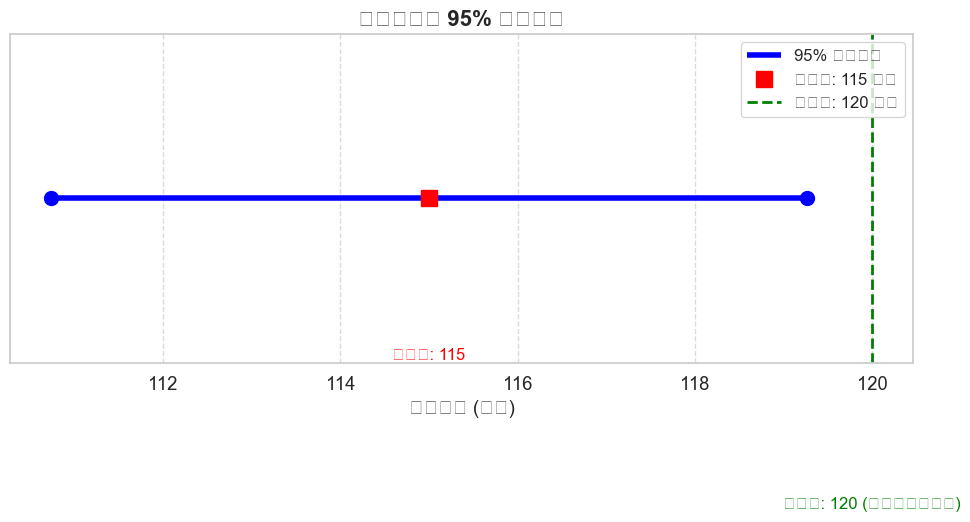

In [4]:
# ========================
# 例题1：参数估计 - 电池寿命问题
# ========================

# 已知数据
n = 16          # 样本量
x_bar = 115     # 样本均值
s = 8           # 样本标准差
mu_claim = 120  # 声称的总体均值

# 1. 点估计
point_estimate = x_bar
print(f"【点估计】总体均值的点估计值: {point_estimate:.2f} 小时")

# 2. 95% 置信区间计算 (t 分布，因为总体标准差未知且 n<30)
alpha = 0.05
df = n - 1  # 自由度
t_critical = stats.t.ppf(1 - alpha/2, df)  # 双尾检验的临界值

# 标准误
se = s / np.sqrt(n)

# 置信区间
ci_lower = x_bar - t_critical * se
ci_upper = x_bar + t_critical * se

print(f"【置信区间】95% 置信区间: ({ci_lower:.3f}, {ci_upper:.3f}) 小时")
print(f"【置信区间】区间宽度: {ci_upper - ci_lower:.3f} 小时")

# 3. 可视化置信区间
plt.figure(figsize=(10, 6))
# 绘制置信区间
plt.hlines(y=0, xmin=ci_lower, xmax=ci_upper, colors='blue', linestyles='-', lw=4, label='95% 置信区间')
plt.plot(ci_lower, 0, 'o', markersize=10, color='blue')
plt.plot(ci_upper, 0, 'o', markersize=10, color='blue')

# 绘制点估计
plt.plot(x_bar, 0, 's', markersize=12, color='red', label=f'点估计: {x_bar} 小时')

# 绘制声称值
plt.axvline(x=mu_claim, color='green', linestyle='--', lw=2, label=f'声称值: {mu_claim} 小时')

# 添加标签和标题
plt.yticks([])
plt.xlabel('电池寿命 (小时)', fontsize=14)
plt.title('电池寿命的 95% 置信区间', fontsize=16, fontweight='bold')
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 添加文本说明
plt.text(x_bar, -0.05, f'点估计: {x_bar}', 
         ha='center', va='top', fontsize=12, color='red')
plt.text(mu_claim, -0.1, f'声称值: {mu_claim} (不在置信区间内)', 
         ha='center', va='top', fontsize=12, color='green')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 例题2：假设检验（算法性能问题）
# 
# **问题背景**：  
# 旧算法预测误差均值为 5%。新算法在 20 个数据集上测试，样本均值误差 4.2%，样本标准差 1.5%。  
# **任务**：  
# 在 α=0.05 下检验新算法是否显著降低预测误差（单尾检验）

【假设设定】
H₀: μ ≥ 5.0%  (新算法未改善)
H₁: μ < 5.0%  (新算法显著降低误差)

【检验统计量】t = -2.385
【p 值】p = 0.0138

【决策】α = 0.05 水平下: 拒绝 H₀
【结论】有充分证据表明新算法显著降低预测误差


/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_45441/1193078415.py:73: UserWarning: Glyph 32479 (\N{CJK UNIFIED IDEOGRAPH-7EDF}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_45441/1193078415.py:73: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_45441/1193078415.py:73: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_45441/1193078415.py:73: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/ipykernel_45441/1193078415.py:73: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/b_/8gzz1fbs4kvbx0f9nz_gwyx00000gn/T/i

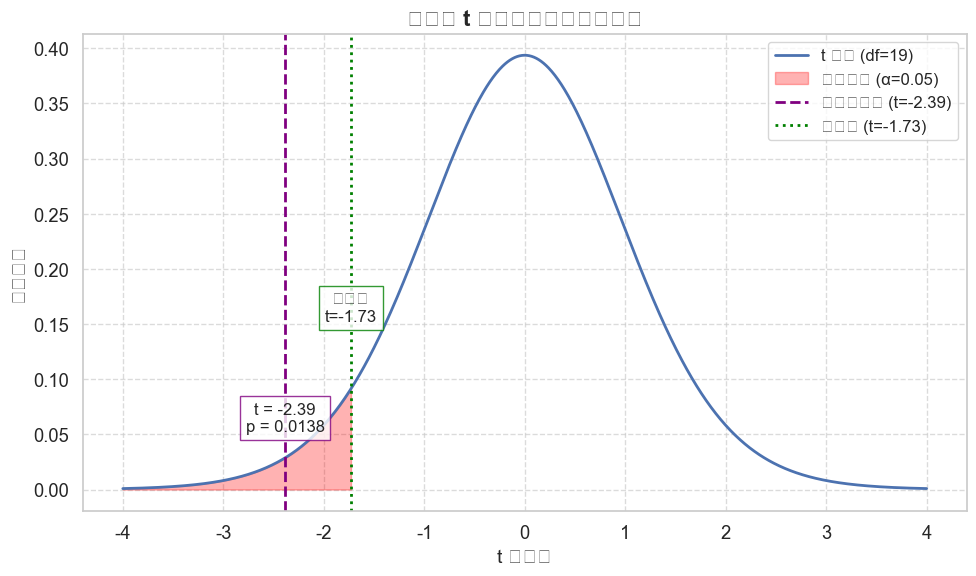

In [5]:
# ========================
# 例题2：假设检验 - 算法性能问题
# ========================

# 已知数据
n_algo = 20        # 样本量
x_bar_algo = 4.2   # 样本均值
s_algo = 1.5       # 样本标准差
mu0 = 5.0          # 旧算法均值（零假设值）
alpha = 0.05       # 显著性水平

# 1. 设定假设
print("【假设设定】")
print("H₀: μ ≥ 5.0%  (新算法未改善)")
print("H₁: μ < 5.0%  (新算法显著降低误差)\n")

# 2. 计算检验统计量 (t 统计量)
t_stat = (x_bar_algo - mu0) / (s_algo / np.sqrt(n_algo))
print(f"【检验统计量】t = {t_stat:.3f}")

# 3. 计算 p 值 (单尾左侧检验)
p_value = stats.t.cdf(t_stat, df=n_algo-1)
print(f"【p 值】p = {p_value:.4f}")

# 4. 决策
if p_value < alpha:
    decision = "拒绝 H₀"
    conclusion = "有充分证据表明新算法显著降低预测误差"
else:
    decision = "不拒绝 H₀"
    conclusion = "无充分证据表明新算法改善性能"

print(f"\n【决策】α = {alpha} 水平下: {decision}")
print(f"【结论】{conclusion}")

# 5. 可视化 t 分布和检验结果
plt.figure(figsize=(10, 6))

# 生成 t 分布数据
df = n_algo - 1
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# 绘制 t 分布
plt.plot(x, y, 'b-', lw=2, label=f't 分布 (df={df})')
# 填充拒绝区域 (左侧)
x_reject = np.linspace(-4, stats.t.ppf(alpha, df), 100)
y_reject = stats.t.pdf(x_reject, df)
plt.fill_between(x_reject, y_reject, 0, color='red', alpha=0.3, 
                 label=f'拒绝区域 (α={alpha})')

# 标记检验统计量
plt.axvline(x=t_stat, color='purple', linestyle='--', lw=2, 
            label=f'检验统计量 (t={t_stat:.2f})')
plt.axvline(x=stats.t.ppf(alpha, df), color='green', linestyle=':', lw=2, 
            label=f'临界值 (t={stats.t.ppf(alpha, df):.2f})')

# 添加标签和标题
plt.xlabel('t 统计量', fontsize=14)
plt.ylabel('概率密度', fontsize=14)
plt.title('单样本 t 检验：新算法性能评估', fontsize=16, fontweight='bold')
plt.legend(loc='upper right', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)

# 添加文本说明
plt.text(t_stat, 0.05, f't = {t_stat:.2f}\np = {p_value:.4f}', 
         ha='center', va='bottom', fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='purple'))
plt.text(stats.t.ppf(alpha, df), 0.15, f'临界值\nt={stats.t.ppf(alpha, df):.2f}', 
         ha='center', va='bottom', fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='green'))

plt.tight_layout()
plt.show()

# 6. 效应大小分析 (建模关键!)
effect_size = (x_bar_algo - mu0) / s_algo
relative_improvement = (mu0 - x_bar_algo) / mu0 * 100